# Red Wine Quality Prediction


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
%matplotlib inline
warnings.filterwarnings('ignore')


In [2]:
# creating Dataframe object
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


There are 12 columns in the dataset. All 12 columns are of numeric types. Out of 12 features, 11 are independent (predictor) variables and remaining one is dependent (response) variable.In this dataset 'quality' is the dependent variable(target variable).



# EDA

In [3]:
# Checking the dimension of dataset 
df.shape


(1599, 12)

The dataset contains 1599 rows and 12 columns including target variable quality.



In [5]:
# Checking the type of dataset
df.dtypes


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

All the indepedndent variable have float64 data type and quality is our target variable which has int64 data type.



In [6]:
# To get good overview of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


This gives the information about the dataset which includes indexing type, column type, no-null values and memory usage.



In [7]:
df.nunique()


fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

This shows the number of unique values in each column.



In [9]:
# Checking null values in the dataframe
df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no missing values in the given dataset so we can proceed further.



In [10]:
# Checking the uniqueness of dataset
df['quality'].unique()


array([5, 6, 7, 4, 8, 3], dtype=int64)

This gives the unique occurrence in the target variable. As we can see from above the 'quality' of wine ranges from 3 to 8.



In [11]:
# List of values in the quality variable
df["quality"].value_counts()


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

This gives the list of values in the target variable which has int64 data type. Here we can observe that the classes are not balanced. I will balance the data later.



# Description of Dataset

In [12]:
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


This gives the statistical information of the dataset. The summary of Red Wine dataset looks perfect since there is no negative/ invalid values present.

In summarizing the data, we can see that the residual sugar has a huge outlier from the max of 15.5 which is quite far from the mean of 2.5 with a median (50%) of 2.2. These differences can also be seen in the free sulfur dioxide , total sulfur dioxide, sulphates and alcohol. From these things we can tell that outliers are present in some columns. We will treat this later.



# Data Visualization

# Univariate Analysis

<AxesSubplot:xlabel='quality', ylabel='count'>

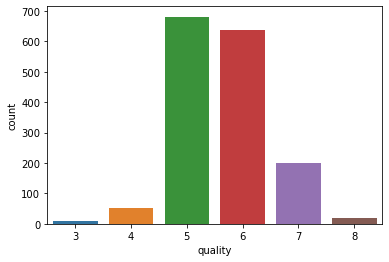

In [13]:
# Visualizing the data after binary classification
sns.countplot(df["quality"])


This count plot shows the range of the target variable (quality) is between 3 to 8. These are the classes in the quality data. We can see that quality classes 5 and 6 are much higher than the other classes data. This is the case of imbalancing, we need to balance this before building our machine learning models.



# Distribution of Skewness

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

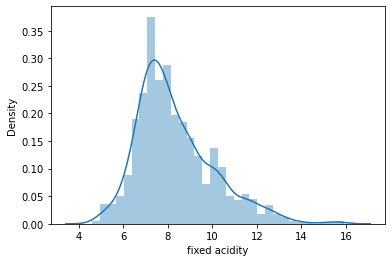

In [14]:
sns.distplot(df["fixed acidity"])


The data is not normally distributed as skewness present here.



<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

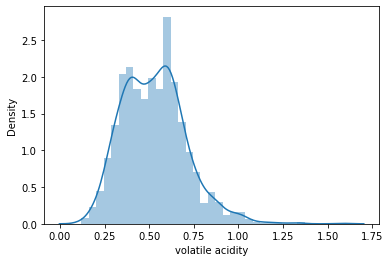

In [15]:
sns.distplot(df["volatile acidity"])


Here we can observe that the data is not normally distributed.



<AxesSubplot:xlabel='citric acid', ylabel='Density'>

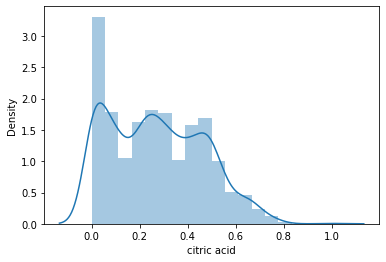

In [16]:
sns.distplot(df["citric acid"])


This distplot shows that the data is normally distributed.



<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

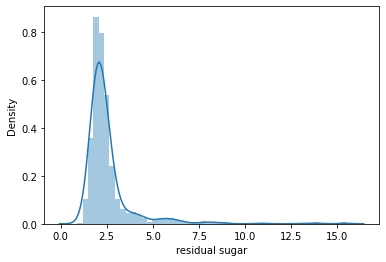

In [17]:
sns.distplot(df["residual sugar"])


Here we can observe that the data is not normally distributed.



<AxesSubplot:xlabel='chlorides', ylabel='Density'>

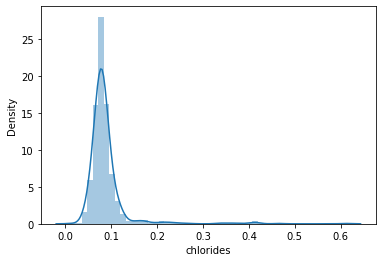

In [18]:
sns.distplot(df["chlorides"])


This distplot shows that the data is not normally distributed and has skewness.



<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

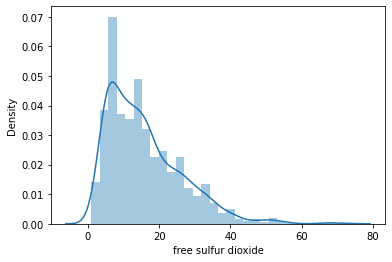

In [19]:
sns.distplot(df["free sulfur dioxide"])


Data is not normally distributd and has skewness.



<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

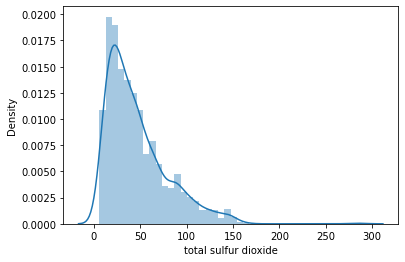

In [20]:
sns.distplot(df["total sulfur dioxide"])


This distplot shows the data is not normally distributed and has skewness.



<AxesSubplot:xlabel='density', ylabel='Density'>

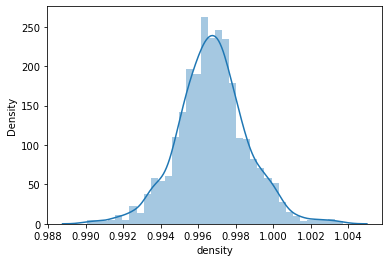

In [22]:
sns.distplot(df["density"])


This distplot shows the data is normally distributed.



<AxesSubplot:xlabel='pH', ylabel='Density'>

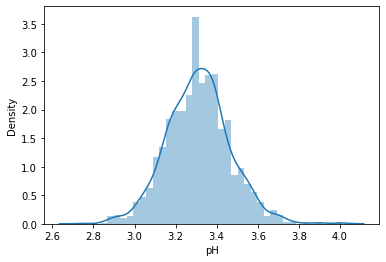

In [23]:
sns.distplot(df["pH"])


This distplot shows that the data is normally distributed.



<AxesSubplot:xlabel='sulphates', ylabel='Density'>

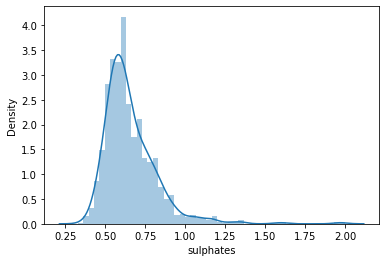

In [24]:
sns.distplot(df["sulphates"])


This distplot shows that the data is not normally distributed and has skewness.



<AxesSubplot:xlabel='alcohol', ylabel='Density'>

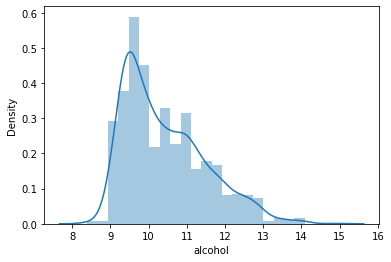

In [25]:
sns.distplot(df["alcohol"])


This distplot shows the data is not normally distributed and has skewness.

From the above distplots we can see that most of the columns are not normally distributed but few columns are showing bell shape which means they are normally distributed. Also we can see the skewness in many columns. We need to treat this skewness present in all the columns in the later part.



# Identifying the outliers

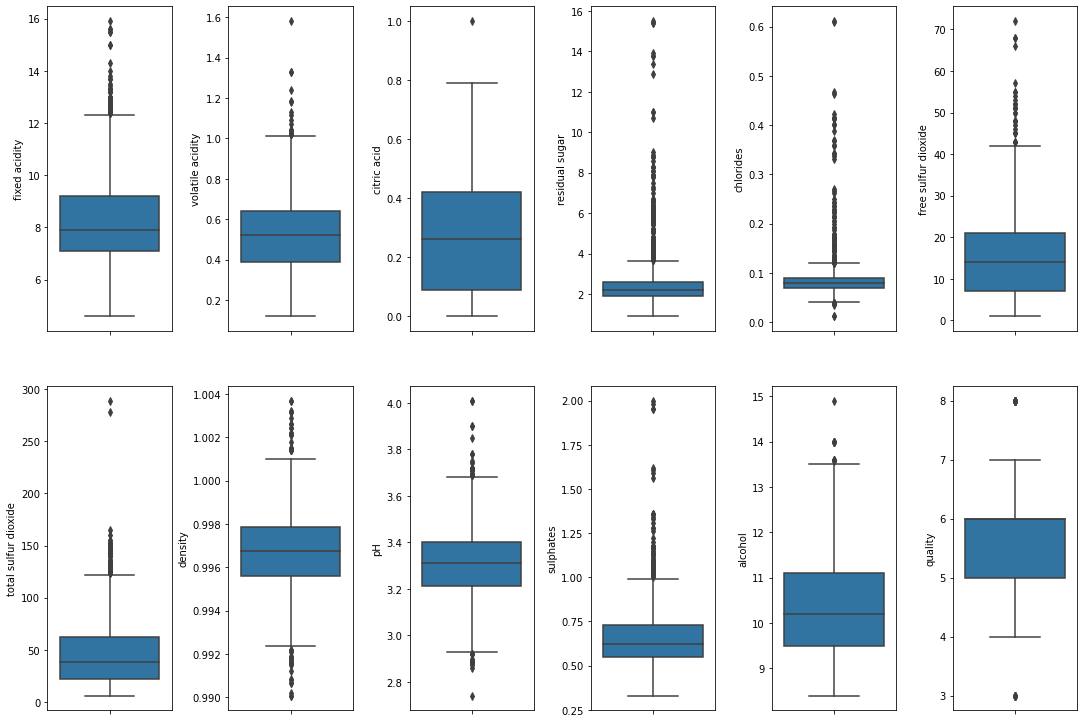

In [26]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()


From this boxplot we can see that outliers present in all the independent variables. We will treat this later. Also we can see that there is also target variable column present here, We will ignore this as we are not going to remove skewness and outliers here. Since it has object type data so we need to encode it.



# Bivariate Analysis

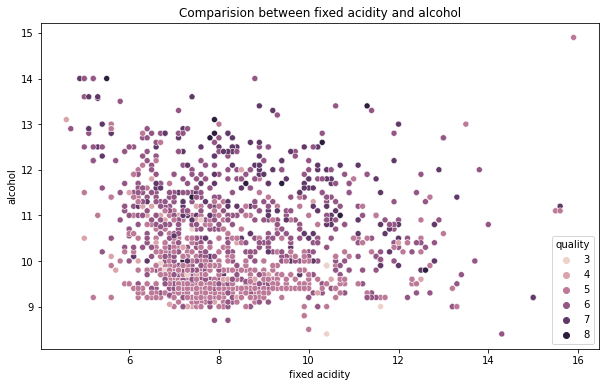

In [27]:
# Checking the relation between two variables
plt.figure(figsize=[10,6])
plt.title('Comparision between fixed acidity and alcohol')
sns.scatterplot(df['fixed acidity'],df['alcohol'],hue=df["quality"]);

This scatter plot shows the comparision between the fixed acidity and alcohol on the basis of target variable 'quality'. There exists weakly negative linear relationship between the two columns. Also we can observe that there are outliers present.

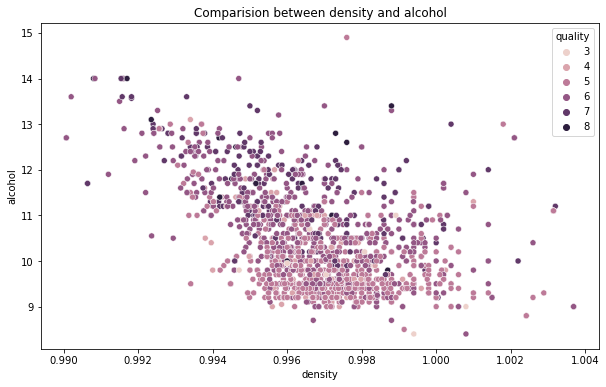

In [28]:
plt.figure(figsize=[10,6])
plt.title('Comparision between density and alcohol')
sns.scatterplot(df['density'],df['alcohol'],hue=df["quality"]);


This scatter plot shows the comparision between the density and alcohol on the basis of target variable quality. There exists strongly negative linear relationship between the two columns. Also we can observe that there are outliers present.

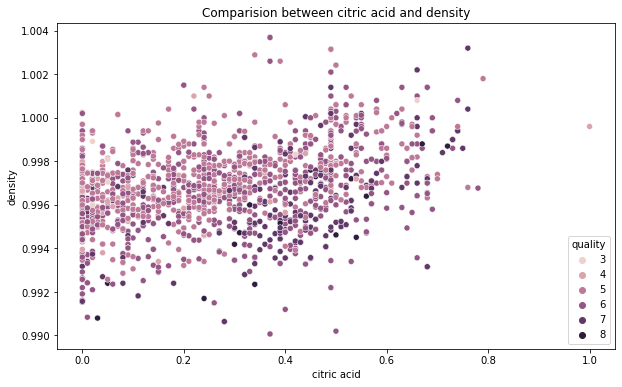

In [29]:
plt.figure(figsize=[10,6])
plt.title('Comparision between citric acid and density')
sns.scatterplot(df['citric acid'],df['density'],hue=df["quality"]);

This scatter plot shows the comparision between the ciric acid and density on the basis of target variable quality. There exists weakly positive linear relationship between the two columns. Also we can observe that there are outliers present.

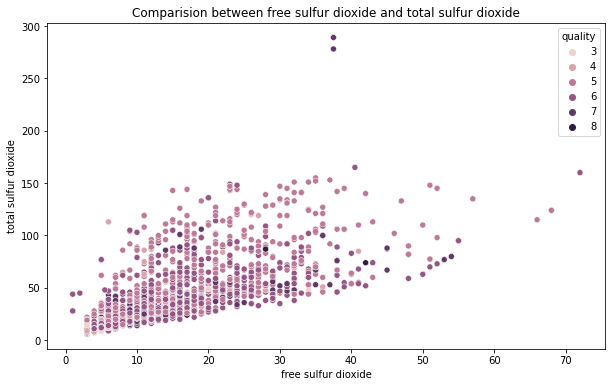

In [30]:
plt.figure(figsize=[10,6])
plt.title('Comparision between free sulfur dioxide and total sulfur dioxide')
sns.scatterplot(df['free sulfur dioxide'],df['total sulfur dioxide'],hue=df["quality"]);


This scatter plot gives the comparision between the free sulfur dioxide and total sulfur dioxide on the basis of target variable. There exists positively linear relationship between the two columns. Also we can observe that there are outliers present.

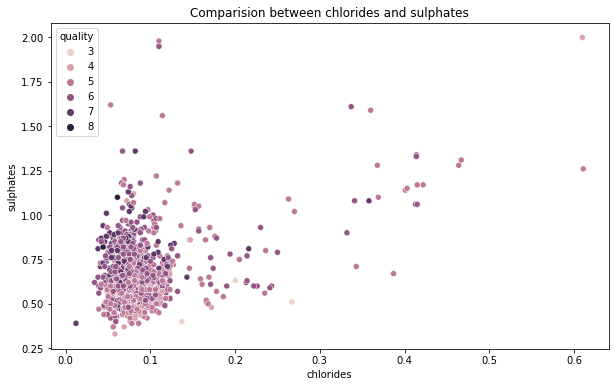

In [31]:
plt.figure(figsize=[10,6])
plt.title('Comparision between chlorides and sulphates')
sns.scatterplot(df['chlorides'],df['sulphates'],hue=df["quality"]);


This scatter plot gives the comparision between the chlorides and sulphates on the basis of target variable. There exists little bit linear relationship between the two columns. Also we can observe that there are outliers present.



# Multivariate Analysis

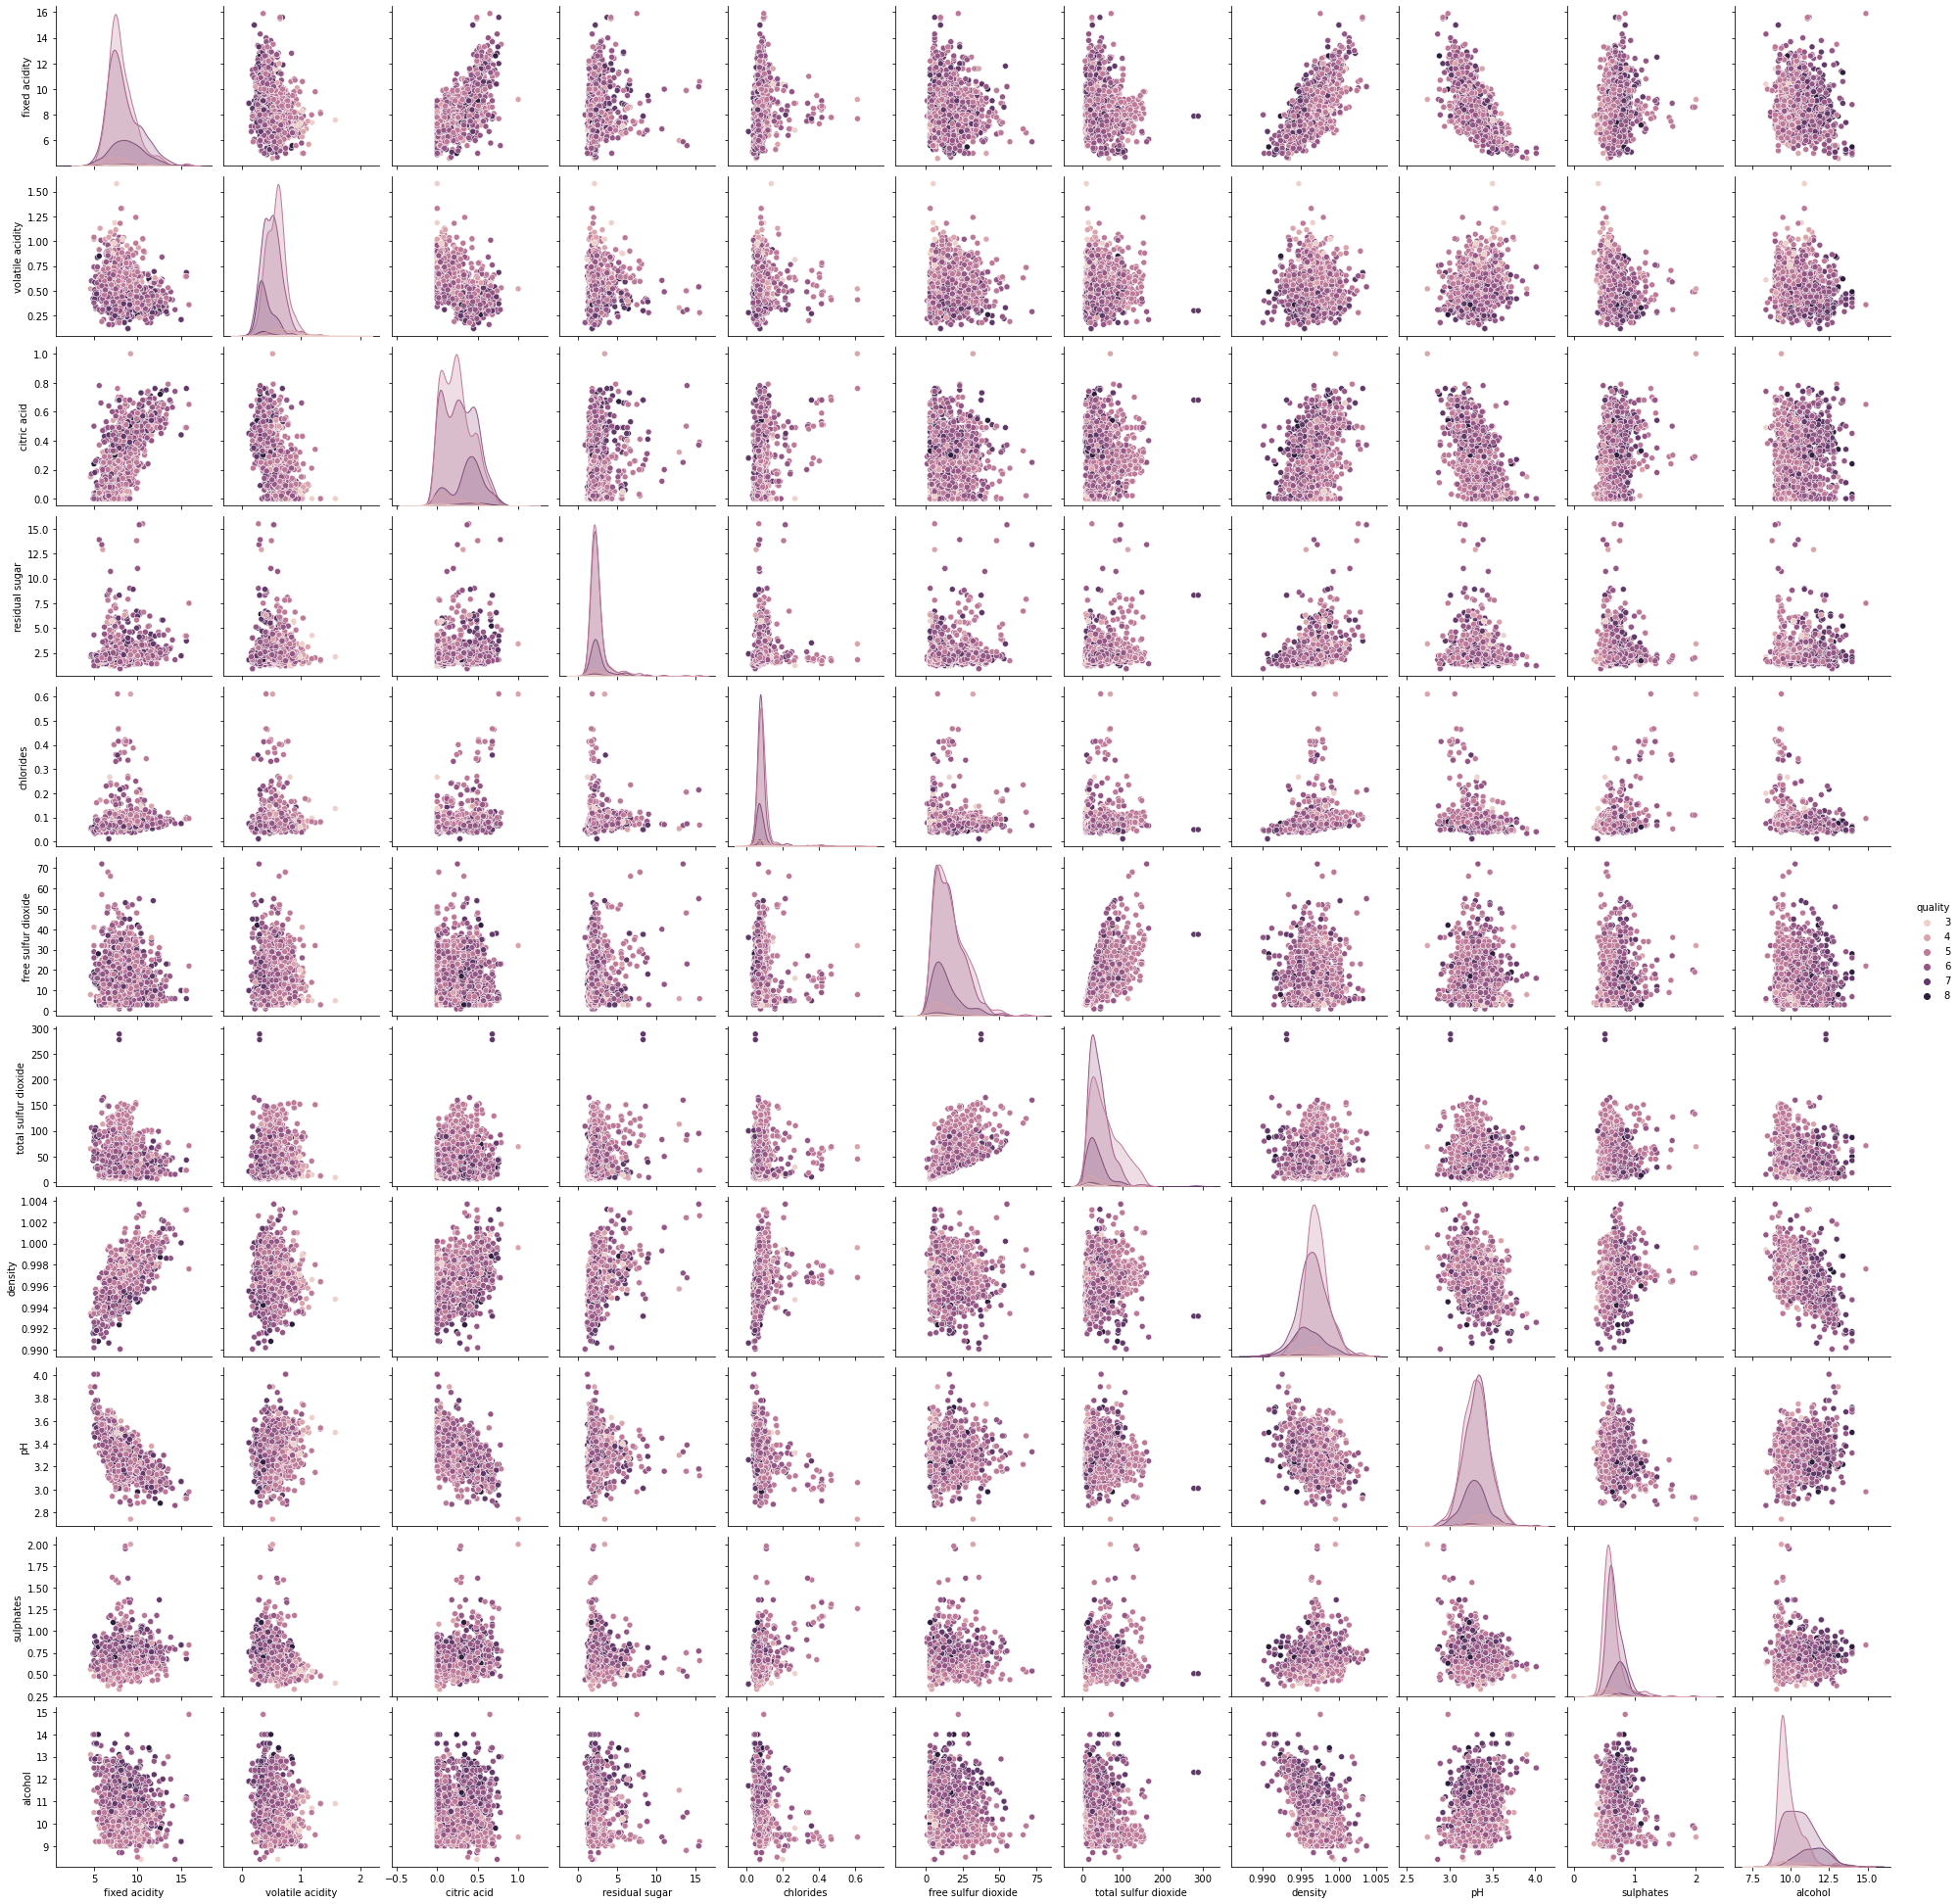

In [32]:
# Checking the pairwise relation in the dataset.
sns.pairplot(df,hue="quality")


This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable'quality'.

From this pairplot we can observe that the correlation exists between two variables and on the diagonal we can see distribution plotting.


# Correlation between the target variable and independent variables using HEAT map


In [33]:
# Creating correlation matrix
cor = df.corr()
cor


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


This gives the correlation between the denpendent and independent variables. We can visualize this by plotting heat map.



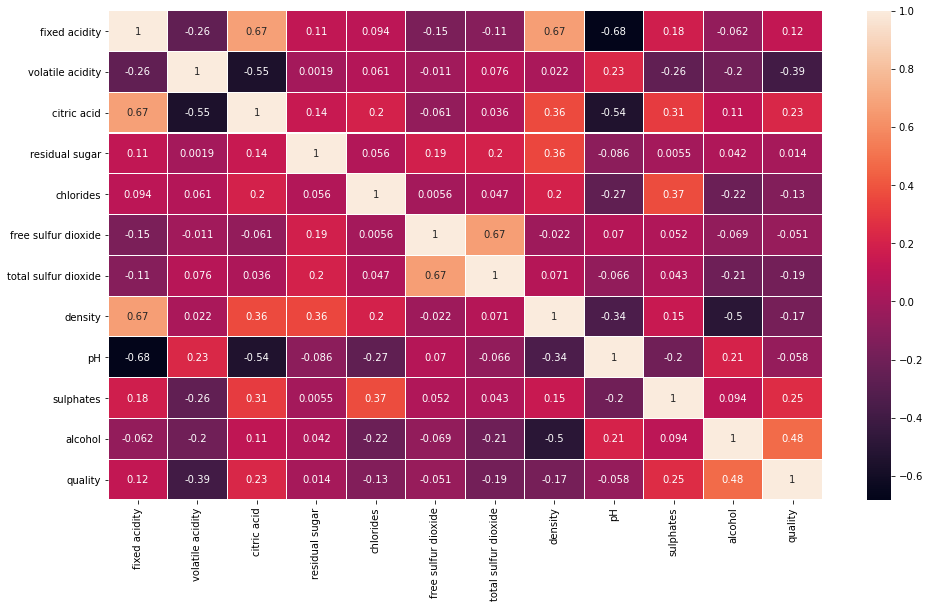

In [34]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),linewidths=.1, annot = True)
plt.yticks(rotation=0);


This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between one feature to other.

This heat map contains both positive and negative correlation.

we can observe that alcohol, sulphates, citric acid and fixed acidity are positively correlated with target variable 'quality'.
volatile acidity, total sulfur dioxide, density and chlorides are negatively correlated with the target variable 'quality'.
total sulfur dioxide and free sulfur dioxide are relatively highly correlated with each other.
fixed acidity with density and citric acid relatively highly correlated.
fixed acidity and pH are highly negatively correlated.
Light shades are highly correlated.
Dark shades are very less correlated.
Also there are some independent variables which shows highly positive and negative correlattion between each other, this causes multicollinearity. If we need to improve the accuracy of our models then we can trreat this problem. But for now I am not going to deal with multicollinearity.

From the heat map we can also observe that total sulfur dioxide and free sulfur dioxide are relatively highly correlated with each other. So we can drop any one of these columns if necessary.



In [35]:
cor['quality'].sort_values(ascending=False)


quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

Positively correlated
Here we can easily observe that alcohol, sulphates, citric acid and fixed acidity are positively correlated with the target variable.

Negatively ocrrelated
Here we can observe that free sulfur dioxide, pH, chlorides, density, total sulfur dioxide and volatile acidity are negatively correlated with the target variable.

# Removing the outliers

# Zscore method

In [36]:
df.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [37]:
variables = df[["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]]


In [38]:
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(variables))

z


array([[0.52835961, 0.96187667, 1.39147228, ..., 1.28864292, 0.57920652,
        0.96024611],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.7199333 , 0.1289504 ,
        0.58477711],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.33117661, 0.04808883,
        0.58477711],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.70550789, 0.54204194,
        0.54162988],
       [1.39015528, 0.65462046, 0.77526673, ..., 1.6773996 , 0.30598963,
        0.20930812],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.51112954, 0.01092425,
        0.54162988]])

Now we have removed the outliers.



In [39]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)]
new_df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


This is the new dataframe after removing the outliers.



In [40]:
df.shape


(1599, 12)

The original dataset contains 1599 rows and 12 columns.



In [41]:
new_df.shape


(1458, 12)

The new dataframe contains 1451 rows and 12 columns.



In [43]:
# Let's check the the data loss
data_loss = (1599-1458)/1599*100
data_loss


8.818011257035648

This is the percentage loss of our data. Here we am not losing more data so I am removing the outliers.



# Converting target variable from multiclassification into binary classification


In [44]:
#Lets convert target variable into binary classification problem 
bins = (2, 6.5, 8)
classes = ['bad', 'good']
new_df['quality'] = pd.cut(new_df['quality'], bins = bins, labels = classes)
new_df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,bad
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,bad
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,bad
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


<AxesSubplot:xlabel='quality', ylabel='count'>

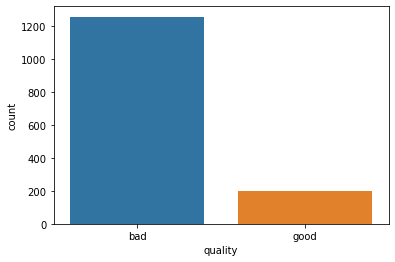

In [45]:
# Let's visualize the data after removing outliers.
sns.countplot(new_df["quality"])


Here we can observe that there are only few good quality wine and more bad quality wine present. The data is also imbalanced. so we will balance it later.



# Checking skewness


In [46]:
# Checking the skewness
new_df.skew()


fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
dtype: float64

Here we can observe that some columns are highly skewed and these columns are not in the acceptable range +0.5 or -0.5. So we need to remove it. Here I am going to ignore quality since it is our target variable so no need to remove skewness in this column.

Here fixed acidity, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates and alcohol have high skewness. Let's remove it.



# Removing skewness using log transformer


In [47]:
# defining skewed columns 
features = ['fixed acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates','alcohol']


In [48]:
# Using log transformer to remove the skewness
new_df['fixed acidity'] = np.log(new_df['fixed acidity'])
new_df['residual sugar'] = np.log(new_df['residual sugar'])
new_df['chlorides'] = np.log(new_df['chlorides'])
new_df['free sulfur dioxide'] = np.log(new_df['free sulfur dioxide'])
new_df['total sulfur dioxide'] = np.log(new_df['total sulfur dioxide'])
new_df['sulphates'] = np.log(new_df['sulphates'])
new_df['alcohol'] = np.log(new_df['alcohol'])


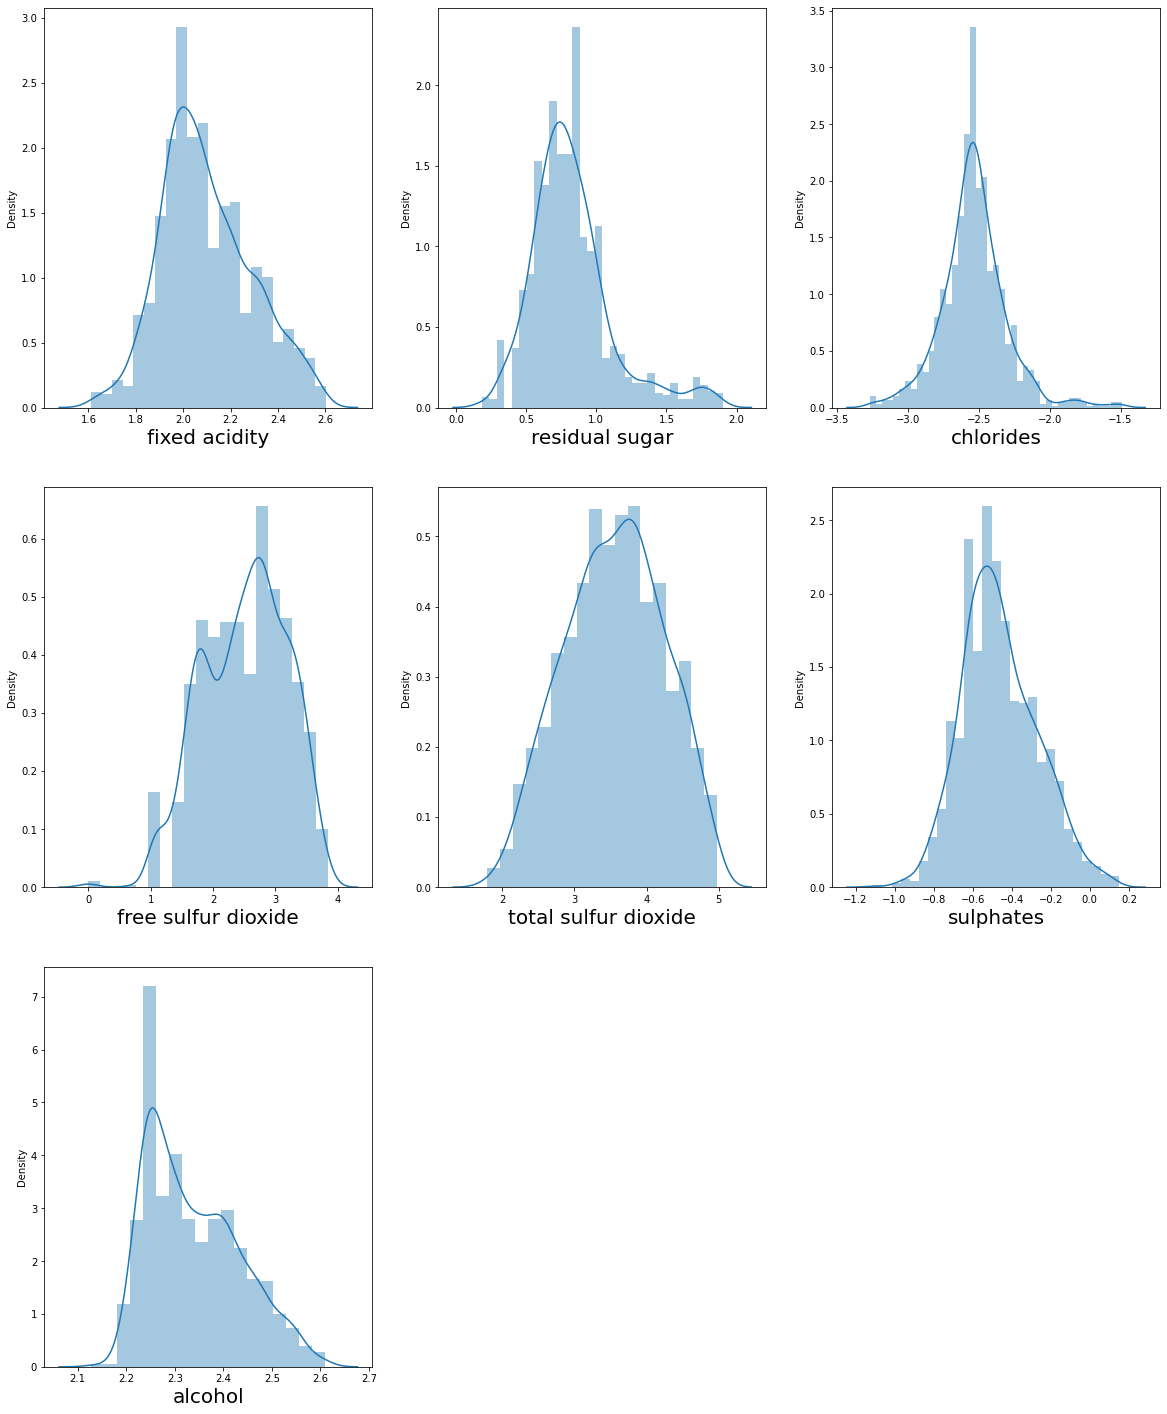

In [49]:
# After using log transformer let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in new_df[features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(new_df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


Here we can observe that the transformed data looks more normally distributed compared to previous one.



In [50]:
# Separating the independent and target variables into x and y
x=new_df.drop("quality",axis=1)
y=new_df["quality"]


In [51]:
y.value_counts()


bad     1257
good     201
Name: quality, dtype: int64

Here we can see that the data is not balanced.

Since we have class imbalance in the dataset so we need to balance it. Here I am using oversampling method to balance the class.



# Oversampling


In [53]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)


In [54]:
y.value_counts()


good    1257
bad     1257
Name: quality, dtype: int64

Now the data has been balanced so we can proceed further.



# Standard Scalarization


In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.624869,1.387617,-1.624385,-0.668170,-0.026713,-0.062686,0.166066,0.783294,1.539893,-0.964643,-1.422110
1,-0.349125,2.487634,-1.624385,0.312692,1.080475,1.175086,1.174324,0.218276,-0.793812,0.059206,-1.004115
2,-0.349125,1.754289,-1.415288,-0.070707,0.805331,0.404927,0.853700,0.331279,-0.342127,-0.178729,-1.004115
3,1.545904,-1.179090,1.302969,-0.668170,-0.084396,0.593632,1.010305,0.896298,-1.094936,-0.779595,-1.004115
4,-0.624869,1.387617,-1.624385,-0.668170,-0.026713,-0.062686,0.166066,0.783294,1.539893,-0.964643,-1.422110
...,...,...,...,...,...,...,...,...,...,...,...
2509,1.146618,-0.012656,1.500868,0.062384,1.425831,-0.976542,-1.114280,0.352816,-1.327313,-0.122453,0.807093
2510,-0.367203,-0.902097,0.254083,0.127598,-0.353700,0.756380,0.401015,-0.895802,0.188105,0.714669,1.270102
2511,0.641752,-0.778114,0.646336,0.046911,-0.033720,0.182667,-0.002555,0.451648,0.065981,0.743074,0.618316
2512,-1.257782,0.227816,-1.172100,-0.010955,-0.389968,0.168645,-0.237429,-1.512645,0.724078,0.372400,1.262424


Now the features are in scale.



# Label Encoding


In [57]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
LE.fit(y)
y = LE.transform(y)
y


array([0, 0, 0, ..., 1, 1, 1])

Now we have converted the categorical data into numerical using label encoding.



# Modeling


# Finding the best random state


In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)


Best accuracy is  0.919205298013245  on Random_state  43


Here we have Best accuracy 92% on Random_state 43



# Creating train_test split


In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=43)


We have created a new train test split using Random State.



In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score


# Decision Tree Classifier


In [61]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))


0.9112582781456954
[[343  35]
 [ 32 345]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       378
           1       0.91      0.92      0.91       377

    accuracy                           0.91       755
   macro avg       0.91      0.91      0.91       755
weighted avg       0.91      0.91      0.91       755



We observe that the data is balanced and we need to check the accuracy score to predict the best model. Here DTC has accuracy 92%.



# Random Forest Classifier


In [62]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))


0.9470198675496688
[[356  22]
 [ 18 359]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       378
           1       0.94      0.95      0.95       377

    accuracy                           0.95       755
   macro avg       0.95      0.95      0.95       755
weighted avg       0.95      0.95      0.95       755



We observe that the data is balanced and we need to check the accuracy score to predict the best model. RFC has accuracy 94%.



# KNN Classifier


In [63]:
knn = KNN()
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))


0.8821192052980132
[[300  78]
 [ 11 366]]
              precision    recall  f1-score   support

           0       0.96      0.79      0.87       378
           1       0.82      0.97      0.89       377

    accuracy                           0.88       755
   macro avg       0.89      0.88      0.88       755
weighted avg       0.89      0.88      0.88       755



KNN has accuracy 89%



# Support Vector Machine Classifier


In [64]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))


0.9019867549668874
[[339  39]
 [ 35 342]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       378
           1       0.90      0.91      0.90       377

    accuracy                           0.90       755
   macro avg       0.90      0.90      0.90       755
weighted avg       0.90      0.90      0.90       755



SVC has accuracy 87%.



# GradientBoostingClassifier


In [65]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))


0.9033112582781457
[[340  38]
 [ 35 342]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       378
           1       0.90      0.91      0.90       377

    accuracy                           0.90       755
   macro avg       0.90      0.90      0.90       755
weighted avg       0.90      0.90      0.90       755



GradientBoostingClassifier has accuracy 90%.



# Checking the Cross Validation Score


In [66]:
from sklearn.model_selection import cross_val_score


In [67]:
print(cross_val_score(DTC,x,y,cv=5).mean())


0.8699143782721995


In [68]:
print(cross_val_score(RFC,x,y,cv=5).mean())


0.9152653798325584


In [69]:
print(cross_val_score(knn,x,y,cv=5).mean())


0.8428718525500383


In [70]:
print(cross_val_score(svc,x,y,cv=5).mean())


0.8731095498720821


In [71]:
print(cross_val_score(GB,x,y,cv=5).mean())


0.8766920390010535


From the observation of accuracy and cross validation score we can predict that Support Vector Machine Classifier is the best model.



# Hyper parameter tuning


In [72]:
from sklearn.model_selection import GridSearchCV


In [73]:
#SupportVectorMachine Classifier
parameters = {'C':[0.001,0.01,0.1,1,10],
              'kernel':['linear', 'poly', 'rbf'],
              'degree':[2,3,4,5],
              'gamma':['scale', 'auto']}


In [74]:
GCV=GridSearchCV(SVC(),parameters,cv=5)


In [75]:
GCV.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'degree': [2, 3, 4, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']})

In [76]:
GCV.best_params_


{'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}

This gives the best parameter value.



In [77]:
wine_quality = SVC(C=10, degree=2, gamma='auto', kernel='rbf')
wine_quality.fit(x_train, y_train)
pred = wine_quality.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)


94.70198675496688


Here the final model gives 94.70% accuracy.



# Plotting ROC and compare AUC using best model


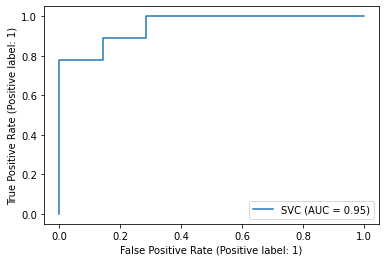

In [79]:
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
x,y = datasets.make_classification (random_state=194)
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,random_state=43)
df = SVC(random_state=43)
df.fit(x_train, y_train)
metrics.plot_roc_curve(df, x_test, y_test)
plt.show()


Here we observe that the ROC curve is produced by calculating the false positive rate against the true positive rate for SVC. The AUC for SVC is 0.95 which is observed in the plot.



# Saving the model


In [80]:
import joblib
joblib.dump(wine_quality,"WineQuality.pkl")


['WineQuality.pkl']